<a href="https://colab.research.google.com/github/pitaconsumer/pitaconsumer.github.io./blob/master/MQ_Practice_python_4_A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).

### Questions
Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and additionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

### Deliverables
More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, please write the function to calculate the confidence interval using the standard error for comparing two means, from scratch:

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let z = 1.96 for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [34]:
import pandas as pd
from scipy import stats #calculate t test
import matplotlib.pyplot as plt # to visualize
import seaborn as sns


In [3]:
# Read csv as a pandas dataframe
titanic_df =  pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

In [11]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_df.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Hypthesis Testing**

*Null Hypothesis*: There is no statistically significant difference in our variable of age between those that survived and those that didn't survive.  

*Alternative Hypothesis*: 
Younger passengers are more likely to survive.

In [16]:
#Let's split up datasets into 2 groups: Survived and "Not Survived"
survived = titanic_df[titanic_df.Survived ==1]
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
#'not_survived'
not_survived = titanic_df[titanic_df.Survived ==0]
not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [20]:
survived.Age.mean()

28.343689655172415

In [22]:
survived.value_counts('Age')

Age
24.00    15
36.00    11
27.00    11
35.00    11
22.00    11
         ..
43.00     1
47.00     1
53.00     1
55.00     1
0.42      1
Length: 65, dtype: int64

In [21]:
not_survived.Age.mean()

30.62617924528302

In [23]:
not_survived.value_counts('Age')

Age
21.0    19
28.0    18
25.0    17
18.0    17
19.0    16
        ..
55.0     1
55.5     1
66.0     1
70.5     1
34.5     1
Length: 77, dtype: int64

Visualizing Age Across 'survived' and 'not survived' groups

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89ed9932d0>]],
      dtype=object)

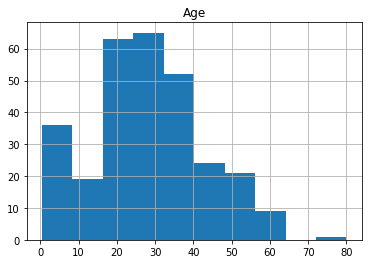

In [18]:
# Visualize the distributions of the ages across 2 groups
survived.hist('Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e43ff390>]],
      dtype=object)

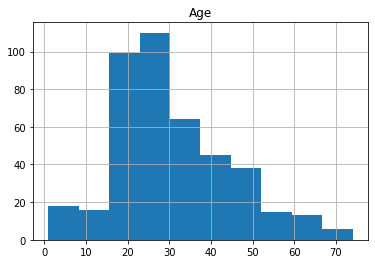

In [19]:
not_survived.hist('Age')

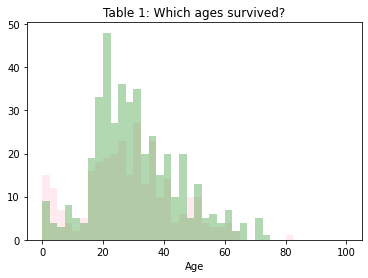

In [33]:
#Overlay into 1 graph
fig, ax = plt.subplots()
plt.hist(survived['Age'], alpha = .3, bins=40, range = (0, 100), color ='pink')
plt.hist(not_survived['Age'], alpha = .3, bins=40, range = (0, 100), color ='green')
ax.set_xlabel('Age')
ax.set_title('Table 1: Which ages survived?')
plt.show()

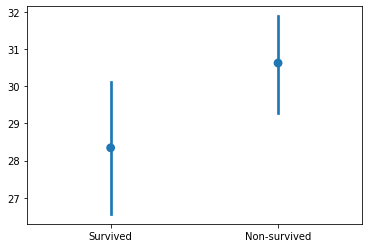

In [36]:
# Visualize the averages of the population based on the samples.
m = sns.pointplot(data=[survived['Age'], not_survived['Age']], join=False)
                        
m.set(xticklabels = ['Survived', 'Non-survived'])
plt.show()


We can see in Table 1 that those who survived, in pink, skew to the left. These people are younger. And the oldest who survived is the oldest in our sample. The passenger was over 80 years old. 

We should consider other variables, like 'fare price' because passengers with higher fare prices may also have a higher likelihood of survival based on their ability to exit Titanic more quickly due to their privileged access. 

* Is there a correlation between fare price and survival? Again, is this difference statistically important?

In [32]:
#Check correlation
titanic_df.corr(method ='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Note: 'Survived' negatively correlates with 'Age'	-0.077221	Meanwhile, 'Survived' positively correlates with 'Fare'	0.257307

**T-Test**

For a t-test, we need to check the divergence from normality of the two populations across 'Survived' and 'Not Survived'. 

In [38]:
#Drop NaN rows to check distribution of populations in both subsets
#of 'Survived' and 'Not Survived'
print(stats.describe(survived.Age.dropna()))
print(stats.describe(not_survived['Age'].dropna()))


DescribeResult(nobs=290, minmax=(0.42, 80.0), mean=28.343689655172415, variance=223.53096523207253, skewness=0.17952298982985943, kurtosis=-0.07723188107788648)
DescribeResult(nobs=424, minmax=(1.0, 74.0), mean=30.62617924528302, variance=200.84869836968645, skewness=0.5835101027554267, kurtosis=0.2652058747777071)


Our population distribution of Age for those surviving has a mean of 28.34 with a variance of 223.53. Our population distribution of Age for those NOT surviving has a higher mean of 30.63 with a variance oof 200.85. Kurtosis for both is close to zero, so we may proceed to conducting a t-test on regarding our Null Hypothesis on 'Age'.  


In [39]:
#Using stats
stats.ttest_ind(survived.Age.dropna(), not_survived.Age.dropna())


Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

Based on this t-test on 'Age' of 'Survived' vs. 'Not Survived', we see that there's a significant difference in survival based on 'Age'. 

For this exercise, please write the function to calculate the confidence interval using the standard error for comparing two means, from scratch:

𝑋1¯−𝑋2¯±𝑧∗𝑠21𝑛1+𝑠22𝑛2‾‾‾‾‾‾‾‾‾√ 

𝑧  is the critical value

𝑠1  sample 1 standard deviation

𝑠2  sample 2 standard deviation

Let z = 1.96 for a 95% confidence level

Use the following method signature:

def get_95_ci(data1, data2)

In [44]:
#NEed numpy library
#Define a function for 95% Confidence Interval 
#For margin of error, use 'z',our critical value of 1.96 for the 95% confidence interval
import numpy as np

def get_95_ci(data1,data2):
    sample_1_n =  data1.shape[0]
    sample_2_n = data2.shape[0]
    sample_1_mean = data1.mean()
    sample_2_mean = data2.mean()
    sample_1_var = data1.var()
    sample_2_var = data2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = np.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = round(mean_difference - margin_of_error,2)
    ci_upper = round(mean_difference + margin_of_error,2)
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [45]:
#Get 95% CI on our subsets of data
get_95_ci(survived['Age'],not_survived['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between -4.26 and -0.3.'

The passengers who survived were on average 0.3 to 4.3 years YOUNGER than those who didn't survive.

We see that the 95% confidence interval does not include 0. Thus, we can tell that the observed difference between the averages of age of survived and not survived passengers is statistically important and we can reject the null hypothesis: There is no statistically significant difference in our variable of age between those that survived and those that didn't survive.

In fact, there is a statistically signifcant difference in our 'Age' variable between those that survived, and those that didn't survive. 

**'Fare' Significance on Survival?**

Check Fare variable

*Null Hypothesis*: There is no statistically significant difference in our variable of 'Fare' between those that survived and those that did not survive.

*Alternative*: 
There is a statistically significant difference in our variable of 'Fare' between populations that survived and population that did not survive.

In [46]:
print(stats.describe(survived.Fare.dropna()))
print(stats.describe(not_survived.Fare.dropna()))

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)
DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)


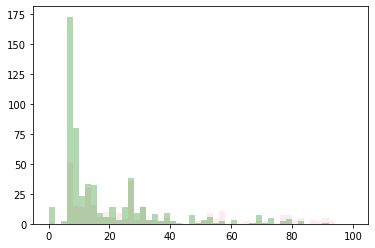

In [48]:
# Visualize the average Fare that are available across these two areas

plt.hist(survived['Fare'], alpha = .3, bins=50, range = (0, 100), color ='pink')
plt.hist(not_survived['Fare'], alpha = .3, bins=50, range = (0, 100), color ='g')
plt.show()

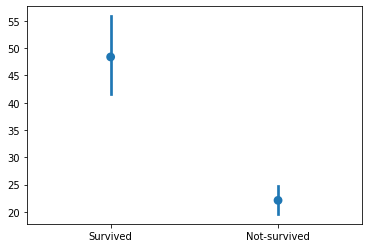

In [49]:
# Visualize the averages of the population based on the samples.
m = sns.pointplot(data=[survived['Fare'], not_survived['Fare']], join=False)
                        
m.set(xticklabels = ['Survived', 'Not-survived'])
plt.show()

Not normally distributed. 
From the Fare pointplot, the passengers who survived, had also paid a significant higher fare for the trip. Let's check if the observed difference is statistically important.

In [50]:
#Drop NaN rows to check distribution of populations in both subsets
#of 'Survived' and 'Not Survived' based on paid 'Fare'
print(stats.describe(survived.Fare.dropna()))
print(stats.describe(not_survived['Fare'].dropna()))

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)
DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)
